<a href="https://colab.research.google.com/github/Pornchita2541/Multivariate/blob/main/%E0%B8%AA%E0%B9%88%E0%B8%87_Exam01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA ชุดข้อมูล pizza

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
print(f'pandas version={pd.__version__}')
print(f'numpy version={np.__version__}')
print(f'seaborn version={sns.__version__}')

pandas version=1.1.5
numpy version=1.19.5
seaborn version=0.11.1


In [10]:
data = pd.read_csv('/content/Pizza.csv')
data

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...,...
295,J,34044,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,J,24069,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,J,34039,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,J,14044,47.60,10.43,15.18,2.32,0.56,24.47,2.76


In [12]:
data.info() # ตรวจสอบ missing values ซึ่งไม่พบค่า missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   brand   300 non-null    object 
 1   id      300 non-null    int64  
 2   mois    300 non-null    float64
 3   prot    300 non-null    float64
 4   fat     300 non-null    float64
 5   ash     300 non-null    float64
 6   sodium  300 non-null    float64
 7   carb    300 non-null    float64
 8   cal     300 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 21.2+ KB


In [13]:
data.columns # แสดง column

Index(['brand', 'id', 'mois', 'prot', 'fat', 'ash', 'sodium', 'carb', 'cal'], dtype='object')

In [14]:
cols=['brand', 'id', 'mois', 'prot', 'fat', 'ash', 'sodium', 'carb', 'cal'] # สร้างตัวแปร column เพื่อง่ายต่อการเรียกใช้งาน

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f46c4bda690>,
      dtype=object)

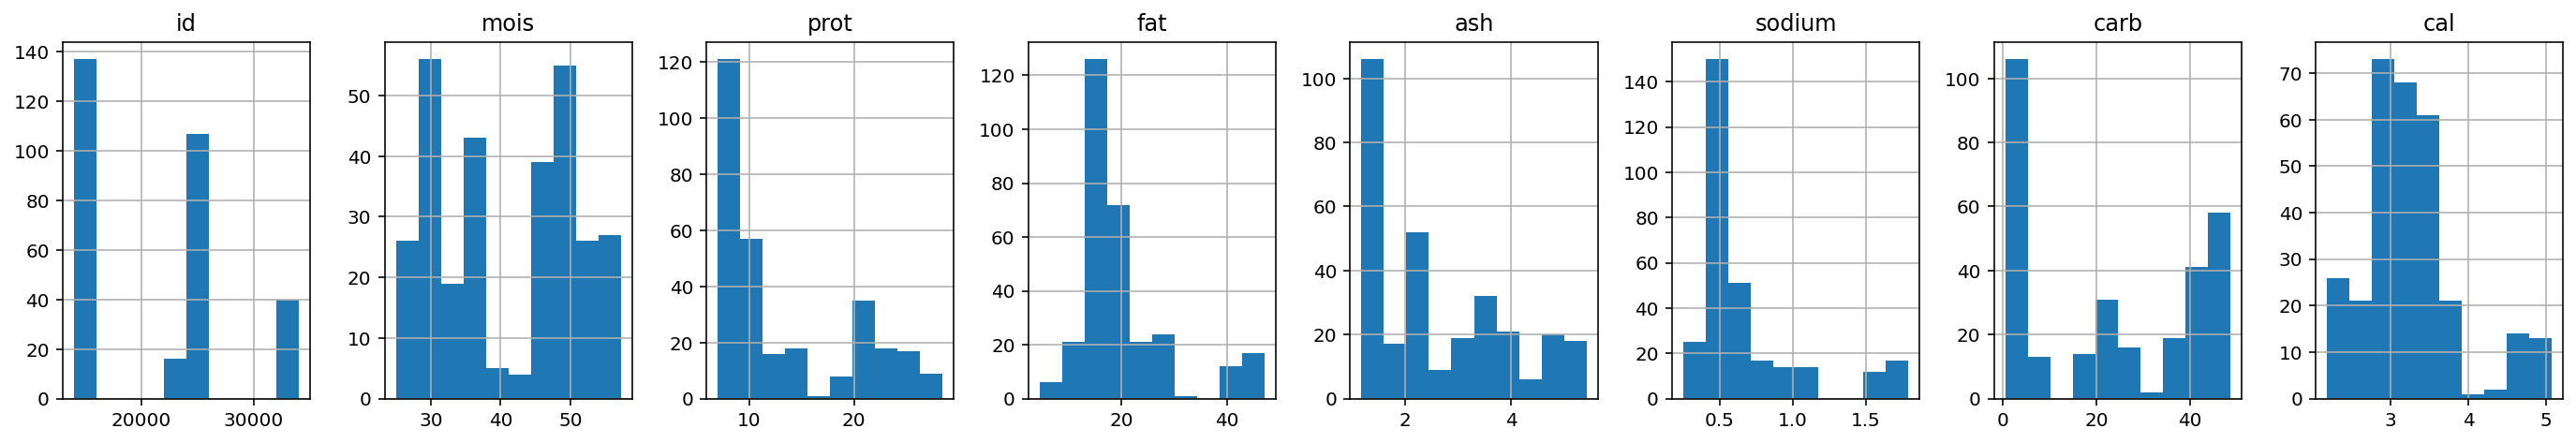

In [15]:
data[cols].hist(layout=(1, len(cols)), figsize=(3*len(cols), 3.5)) #สร้าง Histogram

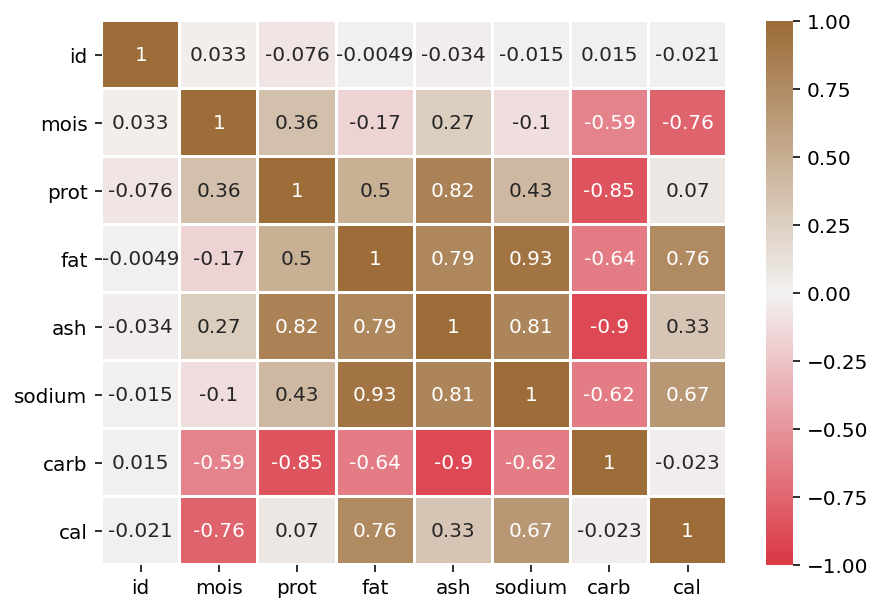

In [25]:
dcorr=df[cols].corr()
mask=np.zeros_like(dcorr)
mask[np.triu_indices_from(mask)]=True
fig, ax=plt.subplots(figsize=(7,5))
sns.heatmap(dcorr, cmap=sns.diverging_palette(10,45,n=100),
            vmin=-1, vmax=1, center=0, linewidths=1, annot=True, ax=ax); #ตรวจสอบ Correlation ดังตารางหากเป็นสีแดงคือความสัมพันธ์ในทิศทางตรงกันข้าม สีน้ำตาลมีความสัมพันธ์ในทิศทางเดียวกัน

# PCA

In [39]:
import numpy as np

In [40]:
data_matrix = np.array(data.iloc[:,2:]) #เอาทุกๆแถว แต่เอาเฉพาะ Column ที่เป็นตัวเลข
data_matrix

array([[27.82, 21.43, 44.87, ...,  1.77,  0.77,  4.93],
       [28.49, 21.26, 43.89, ...,  1.79,  1.02,  4.84],
       [28.35, 19.99, 45.78, ...,  1.63,  0.8 ,  4.95],
       ...,
       [44.55, 11.01, 16.03, ...,  0.64, 25.98,  2.92],
       [47.6 , 10.43, 15.18, ...,  0.56, 24.47,  2.76],
       [46.84,  9.91, 15.5 , ...,  0.57, 25.48,  2.81]])

In [41]:
data_matrix = data_matrix.T #Transport
print(data_matrix.shape)
data_matrix

(7, 300)


array([[27.82, 28.49, 28.35, ..., 44.55, 47.6 , 46.84],
       [21.43, 21.26, 19.99, ..., 11.01, 10.43,  9.91],
       [44.87, 43.89, 45.78, ..., 16.03, 15.18, 15.5 ],
       ...,
       [ 1.77,  1.79,  1.63, ...,  0.64,  0.56,  0.57],
       [ 0.77,  1.02,  0.8 , ..., 25.98, 24.47, 25.48],
       [ 4.93,  4.84,  4.95, ...,  2.92,  2.76,  2.81]])

#1. Standardizing the Data (ปรับ mean และ std ให้ มี mean=0 std=1)

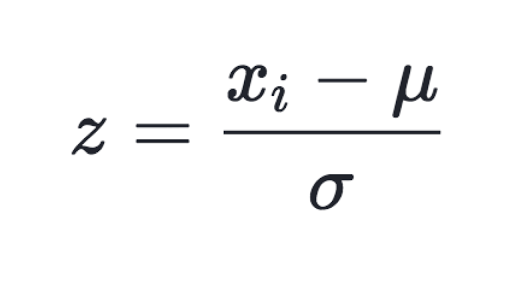

In [42]:
from scipy import stats

In [43]:
data_matrix_m0_std1_useSTAT = stats.zscore(data_matrix,axis=1)
data_matrix_m0_std1_useSTAT 

array([[-1.37181459, -1.30156227, -1.31624186, ...,  0.3823963 ,
         0.70220164,  0.62251244],
       [ 1.25418127,  1.22771661,  1.03000998, ..., -0.36794707,
        -0.45823828, -0.53918903],
       [ 2.74984143,  2.64047481,  2.85139615, ..., -0.46866201,
        -0.56352082, -0.52780927],
       ...,
       [ 2.97668662,  3.03077869,  2.59804213, ..., -0.07951534,
        -0.29588362, -0.26883759],
       [-1.22751105, -1.21362189, -1.22584435, ...,  0.1730719 ,
         0.08918137,  0.14529358],
       [ 2.68012924,  2.53473344,  2.71243942, ..., -0.56704362,
        -0.82552504, -0.7447496 ]])

## 2.   Calculating the covariance matrix (หา covariance matrix ของข้อมูลของเรา)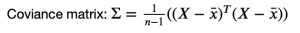

In [44]:
data_cov = np.cov(data_matrix_m0_std1_useSTAT)
data_cov

array([[ 1.00334448,  0.36145252, -0.17189118,  0.26644367, -0.10262097,
        -0.59378092, -0.7669972 ],
       [ 0.36145252,  1.00334448,  0.49966723,  0.82659903,  0.43056473,
        -0.85639691,  0.07049308],
       [-0.17189118,  0.49966723,  1.00334448,  0.79428157,  0.93644671,
        -0.64237943,  0.76712418],
       [ 0.26644367,  0.82659903,  0.79428157,  1.00334448,  0.8108249 ,
        -0.90199502,  0.32756032],
       [-0.10262097,  0.43056473,  0.93644671,  0.8108249 ,  1.00334448,
        -0.6222505 ,  0.67420485],
       [-0.59378092, -0.85639691, -0.64237943, -0.90199502, -0.6222505 ,
         1.00334448, -0.02356313],
       [-0.7669972 ,  0.07049308,  0.76712418,  0.32756032,  0.67420485,
        -0.02356313,  1.00334448]])

In [45]:
eigen_values, eigen_vectors = np.linalg.eig(data_cov)
eigen_values

array([4.18573434e+00, 2.29811778e+00, 4.15948838e-01, 9.54925358e-02,
       2.77695834e-02, 3.38738483e-04, 9.55061572e-06])

In [46]:
eigen_vectors

array([[ 6.47093729e-02,  6.28275866e-01, -4.21668945e-01,
        -2.20721584e-01,  6.47029345e-03, -4.46449902e-01,
        -4.18569035e-01],
       [ 3.78760904e-01,  2.69706650e-01,  7.46027442e-01,
        -1.05931982e-02,  3.87982788e-01,  1.71520300e-04,
        -2.76764643e-01],
       [ 4.46665915e-01, -2.34379085e-01, -1.99308714e-01,
        -5.07042158e-01, -1.73367634e-01,  5.25402868e-01,
        -3.77671525e-01],
       [ 4.71889526e-01,  1.10990417e-01,  5.62726863e-02,
         5.52398549e-01, -6.70885701e-01, -5.88609281e-02,
        -5.60214003e-02],
       [ 4.35702887e-01, -2.01661652e-01, -4.55168874e-01,
         4.46276890e-01,  6.02614079e-01, -3.13098518e-03,
         5.24323817e-04],
       [-4.24913712e-01, -3.20312078e-01,  5.22365058e-02,
         3.34339481e-01, -7.43689883e-03,  5.08853527e-04,
        -7.76067911e-01],
       [ 2.44487304e-01, -5.67457559e-01,  1.13315588e-01,
        -2.79263154e-01, -7.80031747e-02, -7.21913853e-01,
        -1.2059809

## 4. Picking Principal Components Using the Explained Variance (เลือกมาเฉพาะ eigens ที่จำเป็น)
### คำนวณว่า แต่ละ eigen vector อธิบายข้อมูลทั้งหมดได้ดีแค่ไหน

In [47]:
sum(eigen_values)

7.023411371237451

In [48]:
variance_explained = []
for i in eigen_values:
     variance_explained.append((i/sum(eigen_values))*100) #ค่าที่ออกมาจะแสดงเป็นเปอร์เซ็นต์
        
print(variance_explained)

[59.59688423344791, 32.720819826580865, 5.922319175390208, 1.3596318186805214, 0.39538597254041713, 0.004822990783858301, 0.00013598257620882072]


In [49]:
cumulative_variance_explained = np.cumsum(variance_explained) #เอาค่าข้างบนบวกกันขึ้นเรื่อยๆ
print(cumulative_variance_explained)

[ 59.59688423  92.31770406  98.24002324  99.59965505  99.99504103
  99.99986402 100.        ]


## ตรวจสอบขนาดของข้อมูลว่ามี Data กี่ตัวและมีกี่ Dimension

In [50]:
data.shape #ดู dimation ของข้อมูล

(300, 9)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f469c530e50>,
      dtype=object)

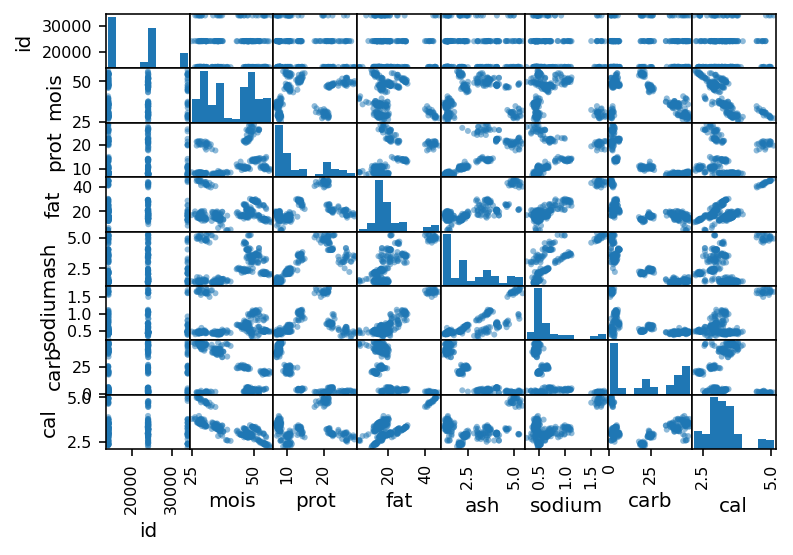

In [53]:
pd.plotting.scatter_matrix(data) #พล็อตScatter matrix เพื่อดูการกระจายของข้อมูลก่อนนำไปวิเคราะห์

## เนื่องจาก Data มี dimension มากเกินไป เราจะทดสอบว่า Column ใดให้ข้อมูลซ้ำกับ Column อื่นแล้วลบมันออก

## เลือกเฉพาะ Column ที่เป็นตัวเลข

In [54]:
newdata = data.iloc[:,2:] 
newdata.head()

,mois,prot,fat,ash,sodium,carb,cal
0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,30.49,21.28,41.65,4.82,1.64,1.76,4.67


## ตรวจสอบว่าระหว่าง Column มี Correlation กันมากน้อยแค่ไหน ด้วย numpy

In [55]:
import numpy as np

In [56]:
corr = np.corrcoef(newdata.to_numpy().T)

In [57]:
corr.shape

(7, 7)

In [58]:
corr

array([[ 1.        ,  0.36024768, -0.17131821,  0.26555552, -0.1022789 ,
        -0.59180165, -0.76444054],
       [ 0.36024768,  1.        ,  0.49800167,  0.8238437 ,  0.42912952,
        -0.85354226,  0.0702581 ],
       [-0.17131821,  0.49800167,  1.        ,  0.79163396,  0.93332522,
        -0.64023817,  0.7645671 ],
       [ 0.26555552,  0.8238437 ,  0.79163396,  1.        ,  0.80812215,
        -0.89898837,  0.32646845],
       [-0.1022789 ,  0.42912952,  0.93332522,  0.80812215,  1.        ,
        -0.62017634,  0.6719575 ],
       [-0.59180165, -0.85354226, -0.64023817, -0.89898837, -0.62017634,
         1.        , -0.02348458],
       [-0.76444054,  0.0702581 ,  0.7645671 ,  0.32646845,  0.6719575 ,
        -0.02348458,  1.        ]])

In [60]:
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if (i !=j) and (corr[i,j] == 1.):
            print(f'row = {i} column = {j} corrcoef = {corr[i,j]}') # ตรวจสอบค่าที่ซ้ำกัน พบว่า ไม่มีค่าซ้ำกัน

ลบ Column ที่ไม่ใช่ตัวเลขออก

In [61]:
data_dropped = data.drop(['brand','id'], axis=1) 
data_dropped

,mois,prot,fat,ash,sodium,carb,cal
0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...
295,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,47.60,10.43,15.18,2.32,0.56,24.47,2.76


In [64]:
data_dropped2 = data.drop(['id'], axis=1) #ลบแค่ column id เพราะต้องเอา brand แต่ละ brand มาเปรียบเทียบในกราฟ
data_dropped2

,brand,mois,prot,fat,ash,sodium,carb,cal
0,A,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...
295,J,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,J,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,J,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,J,47.60,10.43,15.18,2.32,0.56,24.47,2.76


###ทดลอง plot กราฟ

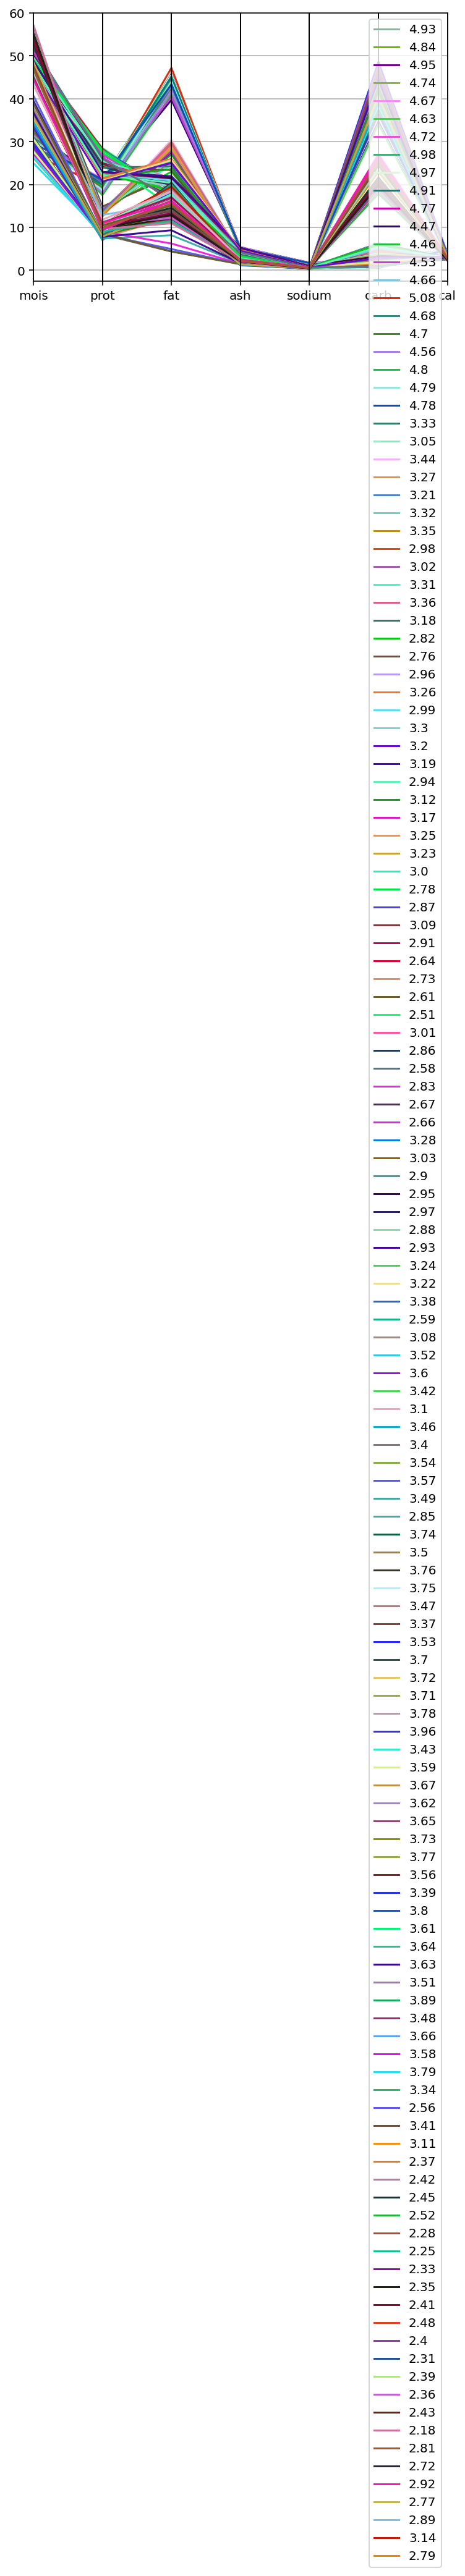

In [65]:
pd.plotting.parallel_coordinates(data_dropped2, 'cal', cols=['mois', 'prot',	'fat',	'ash',	'sodium', 'carb', 'cal']) #พล็อตกราฟแคลอรี่ตั้งแต่ brand A-J

###**ทำ PCA เพื่อลดจำนวน Dimension ของข้อมูล**

In [66]:
from sklearn.decomposition import PCA

In [67]:
pca = PCA(n_components=2)

In [72]:
NEW_PCA = pca.fit_transform(data_dropped.to_numpy())

In [73]:
NEW_PCA.shape

(300, 2)

In [74]:
NEW_PCA

array([[-2.49517479e+01,  2.68116678e+01],
       [-2.46119758e+01,  2.56595634e+01],
       [-2.49384190e+01,  2.69305710e+01],
       [-2.43255609e+01,  2.35235671e+01],
       [-2.38660483e+01,  2.26528128e+01],
       [-2.42716473e+01,  2.25496261e+01],
       [-2.38806695e+01,  2.18852969e+01],
       [-2.23894923e+01,  2.39358506e+01],
       [-2.45074215e+01,  2.66033180e+01],
       [-2.50928469e+01,  2.71508163e+01],
       [-2.48185674e+01,  2.76159021e+01],
       [-2.39395254e+01,  2.75274080e+01],
       [-2.44496724e+01,  2.62221990e+01],
       [-2.28480039e+01,  2.27702098e+01],
       [-2.42812192e+01,  2.25656557e+01],
       [-2.38786302e+01,  2.39995991e+01],
       [-2.32390338e+01,  1.96576785e+01],
       [-2.36081213e+01,  1.88694931e+01],
       [-2.34833228e+01,  2.08403006e+01],
       [-2.30861647e+01,  2.25687679e+01],
       [-2.44317537e+01,  2.88343106e+01],
       [-2.39812139e+01,  2.72251577e+01],
       [-2.43513670e+01,  2.27327854e+01],
       [-2.

## ดูจำนวนแคลอรี่

In [75]:
cal = set(data['cal'])
cal

{2.18,
 2.25,
 2.28,
 2.31,
 2.33,
 2.35,
 2.36,
 2.37,
 2.39,
 2.4,
 2.41,
 2.42,
 2.43,
 2.45,
 2.48,
 2.51,
 2.52,
 2.56,
 2.58,
 2.59,
 2.61,
 2.64,
 2.66,
 2.67,
 2.72,
 2.73,
 2.76,
 2.77,
 2.78,
 2.79,
 2.81,
 2.82,
 2.83,
 2.85,
 2.86,
 2.87,
 2.88,
 2.89,
 2.9,
 2.91,
 2.92,
 2.93,
 2.94,
 2.95,
 2.96,
 2.97,
 2.98,
 2.99,
 3.0,
 3.01,
 3.02,
 3.03,
 3.05,
 3.08,
 3.09,
 3.1,
 3.11,
 3.12,
 3.14,
 3.17,
 3.18,
 3.19,
 3.2,
 3.21,
 3.22,
 3.23,
 3.24,
 3.25,
 3.26,
 3.27,
 3.28,
 3.3,
 3.31,
 3.32,
 3.33,
 3.34,
 3.35,
 3.36,
 3.37,
 3.38,
 3.39,
 3.4,
 3.41,
 3.42,
 3.43,
 3.44,
 3.46,
 3.47,
 3.48,
 3.49,
 3.5,
 3.51,
 3.52,
 3.53,
 3.54,
 3.56,
 3.57,
 3.58,
 3.59,
 3.6,
 3.61,
 3.62,
 3.63,
 3.64,
 3.65,
 3.66,
 3.67,
 3.7,
 3.71,
 3.72,
 3.73,
 3.74,
 3.75,
 3.76,
 3.77,
 3.78,
 3.79,
 3.8,
 3.89,
 3.96,
 4.46,
 4.47,
 4.53,
 4.56,
 4.63,
 4.66,
 4.67,
 4.68,
 4.7,
 4.72,
 4.74,
 4.77,
 4.78,
 4.79,
 4.8,
 4.84,
 4.91,
 4.93,
 4.95,
 4.97,
 4.98,
 5.08}

In [77]:
cal_l = list(cal)  ### แปลงเป็น list
cal_l.sort() ### เรียงค่่า สมาชิกจากน้อยไปมาก
color_list2 = {}
num = 0
for each_fg in cal_l:
    if each_fg not in color_list2:
        color_list2[each_fg] = num
        num += 1

In [78]:
color_list2

{2.18: 0,
 2.25: 1,
 2.28: 2,
 2.31: 3,
 2.33: 4,
 2.35: 5,
 2.36: 6,
 2.37: 7,
 2.39: 8,
 2.4: 9,
 2.41: 10,
 2.42: 11,
 2.43: 12,
 2.45: 13,
 2.48: 14,
 2.51: 15,
 2.52: 16,
 2.56: 17,
 2.58: 18,
 2.59: 19,
 2.61: 20,
 2.64: 21,
 2.66: 22,
 2.67: 23,
 2.72: 24,
 2.73: 25,
 2.76: 26,
 2.77: 27,
 2.78: 28,
 2.79: 29,
 2.81: 30,
 2.82: 31,
 2.83: 32,
 2.85: 33,
 2.86: 34,
 2.87: 35,
 2.88: 36,
 2.89: 37,
 2.9: 38,
 2.91: 39,
 2.92: 40,
 2.93: 41,
 2.94: 42,
 2.95: 43,
 2.96: 44,
 2.97: 45,
 2.98: 46,
 2.99: 47,
 3.0: 48,
 3.01: 49,
 3.02: 50,
 3.03: 51,
 3.05: 52,
 3.08: 53,
 3.09: 54,
 3.1: 55,
 3.11: 56,
 3.12: 57,
 3.14: 58,
 3.17: 59,
 3.18: 60,
 3.19: 61,
 3.2: 62,
 3.21: 63,
 3.22: 64,
 3.23: 65,
 3.24: 66,
 3.25: 67,
 3.26: 68,
 3.27: 69,
 3.28: 70,
 3.3: 71,
 3.31: 72,
 3.32: 73,
 3.33: 74,
 3.34: 75,
 3.35: 76,
 3.36: 77,
 3.37: 78,
 3.38: 79,
 3.39: 80,
 3.4: 81,
 3.41: 82,
 3.42: 83,
 3.43: 84,
 3.44: 85,
 3.46: 86,
 3.47: 87,
 3.48: 88,
 3.49: 89,
 3.5: 90,
 3.51: 91,
 3.52:

In [79]:
data_dropped3 = data_dropped2.replace(color_list2)

In [81]:
from matplotlib import pyplot as plt 

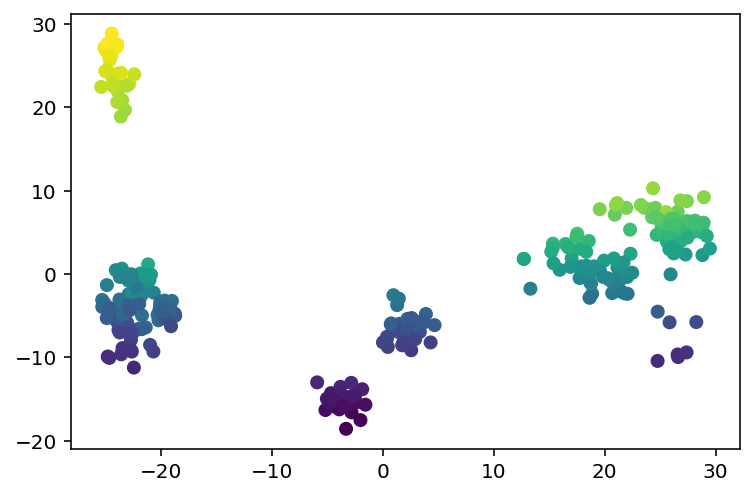

In [82]:
plt.scatter(NEW_PCA[:,0],NEW_PCA[:,1],c = data_dropped3['cal']) #วาดแผนภาพแบบกระจาย

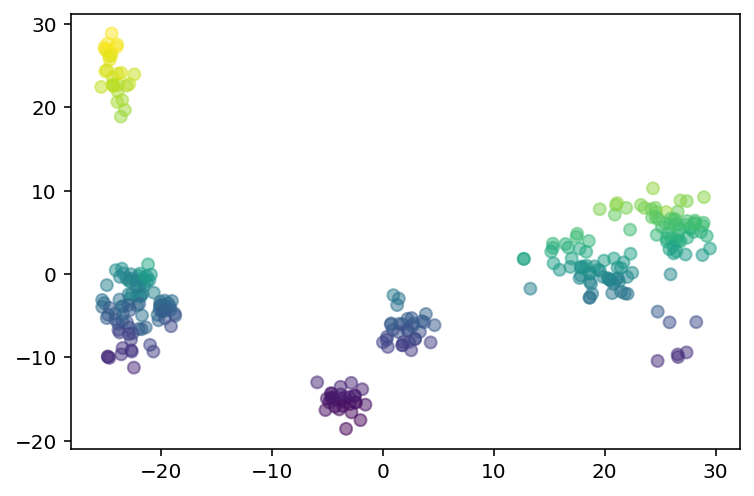

In [83]:
plt.scatter(NEW_PCA[:,0],NEW_PCA[:,1],c = data_dropped3['cal'],alpha=0.5) #alpha คือความโปร่งใส

#**ชุดข้อมูล nndb_flat**

In [109]:
import pandas as pd

In [110]:
data = pd.read_csv('nndb_flat.csv')
data.head(10)

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717,0.85,81.11,0.06,0.06,0.0,684,0.003,0.17,0.0,2.32,3,0.042,0.034,0.005,24,0.000,0.02,2,0.000,24,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717,0.85,81.11,0.06,0.06,0.0,684,0.003,0.13,0.0,2.32,3,0.042,0.034,0.005,24,0.016,0.16,2,0.004,23,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876,0.28,99.48,0.00,0.00,0.0,840,0.001,0.01,0.0,2.80,0,0.003,0.005,0.001,4,0.001,0.00,0,0.000,3,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353,21.40,28.74,2.34,0.50,0.0,198,0.166,1.22,0.0,0.25,36,1.016,0.382,0.029,528,0.040,0.31,23,0.009,387,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371,23.24,29.68,2.79,0.51,0.0,292,0.065,1.26,0.0,0.26,20,0.118,0.351,0.014,674,0.024,0.43,24,0.012,451,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
5,1006,Dairy and Egg Products,"CHEESE,BRIE","Cheese, brie",NaN,NaN,NaN,334,20.75,27.68,0.45,0.45,0.0,174,0.235,1.65,0.0,0.24,65,0.380,0.520,0.070,184,0.019,0.50,20,0.034,188,14.5,2.38,0.193333,0.138235,0.687500,0.0,0.016000,0.1625,0.023750,0.400000,0.058333,0.153333,0.000021,0.047619,0.268571,0.263636,0.216364
6,1007,Dairy and Egg Products,"CHEESE,CAMEMBERT","Cheese, camembert",NaN,NaN,NaN,300,19.80,24.26,0.46,0.46,0.0,241,0.227,1.30,0.0,0.21,62,0.630,0.488,0.028,388,0.021,0.33,20,0.038,347,14.5,2.38,0.267778,0.133529,0.541667,0.0,0.014000,0.1550,0.039375,0.375385,0.023333,0.323333,0.000023,0.047619,0.495714,0.263636,0.216364
7,1008,Dairy and Egg Products,"CHEESE,CARAWAY","Cheese, caraway",NaN,NaN,NaN,376,25.18,29.20,3.06,0.00,0.0,271,0.074,0.27,0.0,0.00,18,0.180,0.450,0.031,673,0.024,0.64,22,0.021,490,14.5,2.94,0.301111,0.043529,0.112500,0.0,0.000000,0.0450,0.011250,0.346154,0.025833,0.560833,0.000027,0.052381,0.700000,0.263636,0.267273
8,1009,Dairy and Egg Products,"CHEESE,CHEDDAR","Cheese, cheddar",NaN,NaN,NaN,406,24.04,33.82,1.33,0.28,0.0,263,0.049,0.88,0.0,0.78,26,0.039,0.434,0.027,675,0.056,0.16,27,0.033,473,28.3,3.43,0.292222,0.028824,0.366667,0.0,0.052000,0.0650,0.002437,0.333846,0.022500,0.562500,0.000062,0.064286,0.675714,0.514545,0.311818
9,1010,Dairy and Egg Products,"CHEESE,CHESHIRE","Cheese, cheshire",NaN,NaN,NaN,387,23.37,30.60,4.78,0.00,0.0,233,0.074,0.83,0.0,0.00,18,0.080,0.293,0.046,643,0.042,0.21,21,0.012,464,14.5,2.79,0.258889,0.043529,0.345833,0.0,0.000000,0.0450,0.005000,0.225385,0.038333,0.535833,0.000047,0.050000,0.662857,0.263636,0.253636


###**ตรวจสอบขนาดของข้อมูลว่ามี data กี่ตัว และมีกี่ dimensions**

In [111]:
data.shape

(8618, 45)

##**เนื่องจาก Data มี dimension มากเกินไป เราจะทดสอบดูว่า column ใด ให้ข้อมูลซ้ำกับ column อื่น แล้วลบมันออก**

In [112]:
newdata = data.iloc[:,7:] #เลือกข้อมูลลำดับที่ 7 เพราะเป็นตัวเลข
newdata.head()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,717,0.85,81.11,0.06,0.06,0.0,684,0.003,0.17,0.0,2.32,3,0.042,0.034,0.005,24,0.000,0.02,2,0.000,24,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,717,0.85,81.11,0.06,0.06,0.0,684,0.003,0.13,0.0,2.32,3,0.042,0.034,0.005,24,0.016,0.16,2,0.004,23,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,876,0.28,99.48,0.00,0.00,0.0,840,0.001,0.01,0.0,2.80,0,0.003,0.005,0.001,4,0.001,0.00,0,0.000,3,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,353,21.40,28.74,2.34,0.50,0.0,198,0.166,1.22,0.0,0.25,36,1.016,0.382,0.029,528,0.040,0.31,23,0.009,387,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,371,23.24,29.68,2.79,0.51,0.0,292,0.065,1.26,0.0,0.26,20,0.118,0.351,0.014,674,0.024,0.43,24,0.012,451,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


###**ตรวจสอบว่า ระหว่าง columns มี correlation กันมากน้อยแค่ไหน ด้วย numpy**

In [113]:
import numpy as np

In [125]:
corr = np.corrcoef(newdata.to_numpy().T)

In [126]:
corr.shape

(38, 38)

In [127]:
corr

array([[1.        , 0.11030203, 0.80679472, ..., 0.19518065, 0.05667274,
        0.11276635],
       [0.11030203, 1.        , 0.05471538, ..., 0.44460761, 0.37836917,
        0.41631538],
       [0.80679472, 0.05471538, 1.        , ..., 0.06608644, 0.03755914,
        0.02826352],
       ...,
       [0.19518065, 0.44460761, 0.06608644, ..., 1.        , 0.22368557,
        0.26657694],
       [0.05667274, 0.37836917, 0.03755914, ..., 0.22368557, 1.        ,
        0.20529859],
       [0.11276635, 0.41631538, 0.02826352, ..., 0.26657694, 0.20529859,
        1.        ]])

In [128]:
newdata.iloc[:5,10:30] 

,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA
0,2.32,3,0.042,0.034,0.005,24,0.000,0.02,2,0.000,24,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625
1,2.32,3,0.042,0.034,0.005,24,0.016,0.16,2,0.004,23,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625
2,2.80,0,0.003,0.005,0.001,4,0.001,0.00,0,0.000,3,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188
3,0.25,36,1.016,0.382,0.029,528,0.040,0.31,23,0.009,387,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500
4,0.26,20,0.118,0.351,0.014,674,0.024,0.43,24,0.012,451,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375


In [129]:
from matplotlib import pyplot as plt

###**data ที่มี correlation เป็น 1**

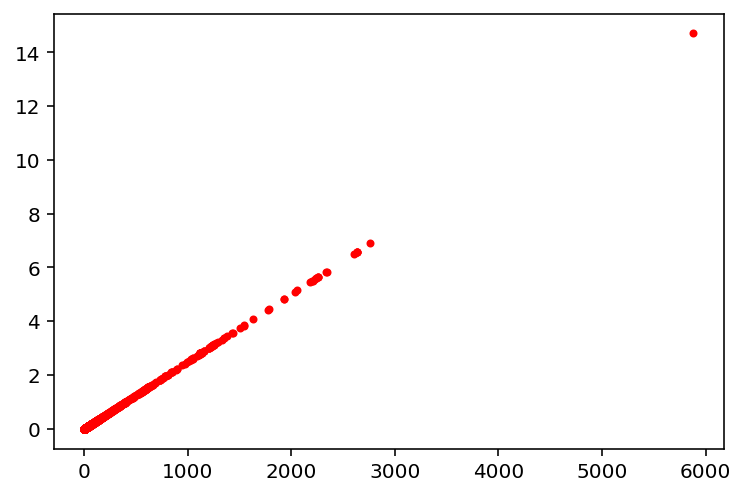

In [130]:
plt.plot(newdata.iloc[:,11],newdata.iloc[:,28],'r.') #ค่า correlation เท่ากับ 1 เเต่คนละค่าเวลา plot กราฟจะเป็นเส้นตรง

###**data ที่มี correlation เป็นค่าอื่นๆ**

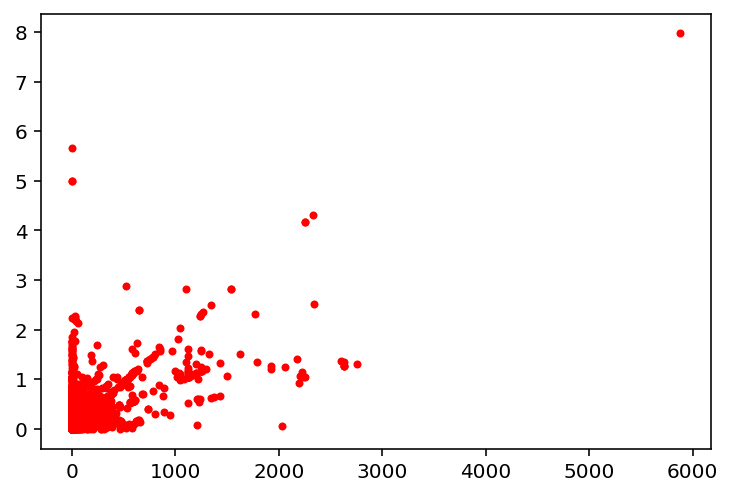

In [131]:
plt.plot(newdata.iloc[:,11],newdata.iloc[:,29],'r.') #ค่า correlation ที่ไม่ได้มาจากที่เดียวกันเวลา plotกราฟจะเกิดการกระจาย

In [132]:
newdata.columns.str.contains('_USRDA') #คอลัมน์ที่เป็น True คือประกอบด้วยคำว่า _USRDA อยู่ในคอลัมน์

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [133]:
newdata.columns[newdata.columns.str.contains('_USRDA')].values #.valuse เอาเฉพาะ columns ที่เป็น ture

array(['VitA_USRDA', 'VitB6_USRDA', 'VitB12_USRDA', 'VitC_USRDA',
       'VitE_USRDA', 'Folate_USRDA', 'Niacin_USRDA', 'Riboflavin_USRDA',
       'Thiamin_USRDA', 'Calcium_USRDA', 'Copper_USRDA',
       'Magnesium_USRDA', 'Phosphorus_USRDA', 'Selenium_USRDA',
       'Zinc_USRDA'], dtype=object)

In [134]:
newdata.drop(newdata.columns[newdata.columns.str.contains('_USRDA')].values, axis=1)

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,717,0.85,81.11,0.06,0.06,0.0,684,0.003,0.17,0.0,2.32,3,0.042,0.034,0.005,24,0.000,0.02,2,0.000,24,1.0,0.09
1,717,0.85,81.11,0.06,0.06,0.0,684,0.003,0.13,0.0,2.32,3,0.042,0.034,0.005,24,0.016,0.16,2,0.004,23,1.0,0.05
2,876,0.28,99.48,0.00,0.00,0.0,840,0.001,0.01,0.0,2.80,0,0.003,0.005,0.001,4,0.001,0.00,0,0.000,3,0.0,0.01
3,353,21.40,28.74,2.34,0.50,0.0,198,0.166,1.22,0.0,0.25,36,1.016,0.382,0.029,528,0.040,0.31,23,0.009,387,14.5,2.66
4,371,23.24,29.68,2.79,0.51,0.0,292,0.065,1.26,0.0,0.26,20,0.118,0.351,0.014,674,0.024,0.43,24,0.012,451,14.5,2.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,305,18.50,25.10,0.00,0.00,0.0,47,0.410,12.00,0.0,2.38,15,3.300,0.190,0.020,66,0.100,1.40,60,0.000,254,73.4,1.10
8614,111,20.54,0.84,5.41,0.00,0.0,2,0.112,2.15,0.0,0.00,20,1.076,0.024,0.012,10,0.033,0.58,37,0.029,426,21.7,1.55
8615,269,0.00,0.00,73.14,73.20,0.0,0,0.000,0.00,0.0,0.00,0,0.100,0.060,0.130,13,0.020,3.60,10,0.000,8,0.7,0.19
8616,90,16.10,1.40,2.00,0.00,0.0,30,0.130,0.50,0.0,5.00,6,1.400,0.120,0.010,10,0.400,3.50,250,0.000,272,27.4,1.00


###**ลบ columns ที่มีค่า correlation เป็น 1 เมื่อเทียบกับ column อื่น**

In [135]:
newdata_dropped = newdata.drop(['VitE_mg','Niacin_mg','Riboflavin_mg','Thiamin_mg','Magnesium_mg','Phosphorus_mg','Zinc_mg'], axis=1)
newdata_dropped

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,717,0.85,81.11,0.06,0.06,0.0,684,0.003,0.17,0.0,3,24,0.000,0.02,0.000,1.0,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,717,0.85,81.11,0.06,0.06,0.0,684,0.003,0.13,0.0,3,24,0.016,0.16,0.004,1.0,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,876,0.28,99.48,0.00,0.00,0.0,840,0.001,0.01,0.0,0,4,0.001,0.00,0.000,0.0,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,353,21.40,28.74,2.34,0.50,0.0,198,0.166,1.22,0.0,36,528,0.040,0.31,0.009,14.5,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,371,23.24,29.68,2.79,0.51,0.0,292,0.065,1.26,0.0,20,674,0.024,0.43,0.012,14.5,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,305,18.50,25.10,0.00,0.00,0.0,47,0.410,12.00,0.0,15,66,0.100,1.40,0.000,73.4,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,111,20.54,0.84,5.41,0.00,0.0,2,0.112,2.15,0.0,20,10,0.033,0.58,0.029,21.7,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,269,0.00,0.00,73.14,73.20,0.0,0,0.000,0.00,0.0,0,13,0.020,3.60,0.000,0.7,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90,16.10,1.40,2.00,0.00,0.0,30,0.130,0.50,0.0,6,10,0.400,3.50,0.000,27.4,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


In [136]:
data_dropped = data.drop(['ID','ShortDescrip','Descrip','CommonName','MfgName','ScientificName','VitE_mg','Niacin_mg','Riboflavin_mg','Thiamin_mg','Magnesium_mg','Phosphorus_mg','Zinc_mg'], axis=1)
data_dropped

,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,Dairy and Egg Products,717,0.85,81.11,0.06,0.06,0.0,684,0.003,0.17,0.0,3,24,0.000,0.02,0.000,1.0,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,Dairy and Egg Products,717,0.85,81.11,0.06,0.06,0.0,684,0.003,0.13,0.0,3,24,0.016,0.16,0.004,1.0,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,Dairy and Egg Products,876,0.28,99.48,0.00,0.00,0.0,840,0.001,0.01,0.0,0,4,0.001,0.00,0.000,0.0,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,Dairy and Egg Products,353,21.40,28.74,2.34,0.50,0.0,198,0.166,1.22,0.0,36,528,0.040,0.31,0.009,14.5,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,Dairy and Egg Products,371,23.24,29.68,2.79,0.51,0.0,292,0.065,1.26,0.0,20,674,0.024,0.43,0.012,14.5,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,Finfish and Shellfish Products,305,18.50,25.10,0.00,0.00,0.0,47,0.410,12.00,0.0,15,66,0.100,1.40,0.000,73.4,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,Finfish and Shellfish Products,111,20.54,0.84,5.41,0.00,0.0,2,0.112,2.15,0.0,20,10,0.033,0.58,0.029,21.7,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,Sweets,269,0.00,0.00,73.14,73.20,0.0,0,0.000,0.00,0.0,0,13,0.020,3.60,0.000,0.7,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,Finfish and Shellfish Products,90,16.10,1.40,2.00,0.00,0.0,30,0.130,0.50,0.0,6,10,0.400,3.50,0.000,27.4,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


###**ทดลอง plot กราฟ**

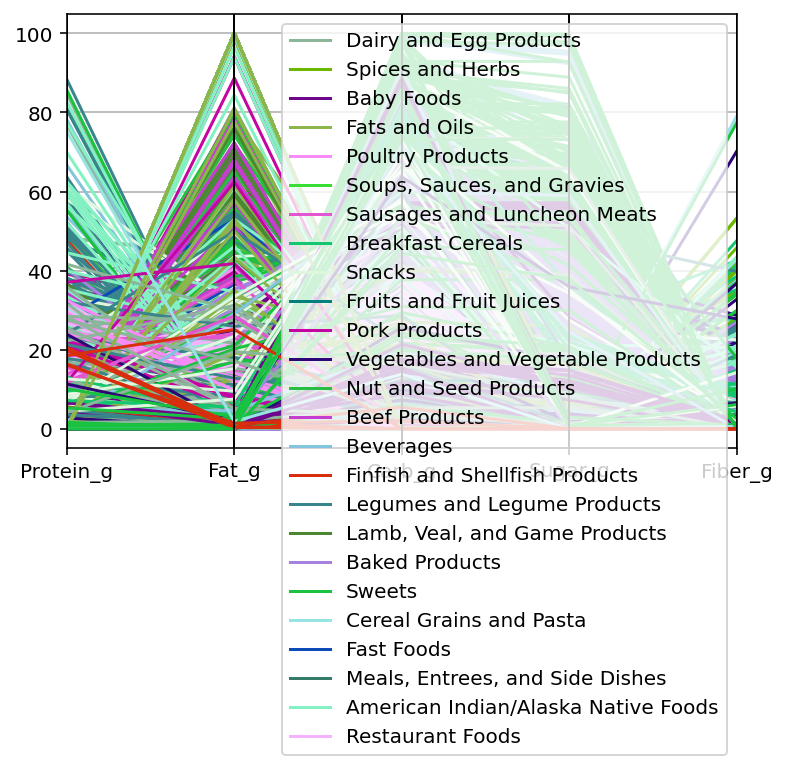

In [137]:
pd.plotting.parallel_coordinates(data_dropped, 'FoodGroup', cols=['Protein_g', 'Fat_g',	'Carb_g',	'Sugar_g',	'Fiber_g'])

### **ทำ PCA เพื่อลดจำนวน Dimension ของข้อมูล**

In [138]:
from sklearn.decomposition import PCA

In [139]:
pca = PCA(n_components=2)

In [140]:
new_pca = pca.fit_transform(newdata_dropped.to_numpy())

In [141]:
new_pca.shape

(8618, 2)

In [142]:
new_pca

array([[ 590.95286674,   85.56968946],
       [ 590.95284476,   85.57159456],
       [ 747.5994042 ,  117.79120834],
       ...,
       [ -95.72739188,  -53.51885094],
       [ -66.70492177, -118.10632681],
       [ -65.40356382,  -28.88067151]])

### **ดูว่ามี food group อะไรบ้าง**

In [143]:
FG = set(data['FoodGroup'])
FG

{'American Indian/Alaska Native Foods',
 'Baby Foods',
 'Baked Products',
 'Beef Products',
 'Beverages',
 'Breakfast Cereals',
 'Cereal Grains and Pasta',
 'Dairy and Egg Products',
 'Fast Foods',
 'Fats and Oils',
 'Finfish and Shellfish Products',
 'Fruits and Fruit Juices',
 'Lamb, Veal, and Game Products',
 'Legumes and Legume Products',
 'Meals, Entrees, and Side Dishes',
 'Nut and Seed Products',
 'Pork Products',
 'Poultry Products',
 'Restaurant Foods',
 'Sausages and Luncheon Meats',
 'Snacks',
 'Soups, Sauces, and Gravies',
 'Spices and Herbs',
 'Sweets',
 'Vegetables and Vegetable Products'}

### **สร้าง Dictionary เพื่อแทนค่าที่เป็น text ให้เป็นตัวเลข เพื่อจะได้ plot สีได้**

####**สร้าง ​color list**

In [144]:
FG_l = list(FG)  ### แปลงเป็น list
FG_l.sort() ### เรียงค่่า สมาชิกจากน้อยไปมาก
color_list2 = {}
num = 0
for each_fg in FG_l:
    if each_fg not in color_list2:
        color_list2[each_fg] = num
        num += 1

In [145]:
color_list2

{'American Indian/Alaska Native Foods': 0,
 'Baby Foods': 1,
 'Baked Products': 2,
 'Beef Products': 3,
 'Beverages': 4,
 'Breakfast Cereals': 5,
 'Cereal Grains and Pasta': 6,
 'Dairy and Egg Products': 7,
 'Fast Foods': 8,
 'Fats and Oils': 9,
 'Finfish and Shellfish Products': 10,
 'Fruits and Fruit Juices': 11,
 'Lamb, Veal, and Game Products': 12,
 'Legumes and Legume Products': 13,
 'Meals, Entrees, and Side Dishes': 14,
 'Nut and Seed Products': 15,
 'Pork Products': 16,
 'Poultry Products': 17,
 'Restaurant Foods': 18,
 'Sausages and Luncheon Meats': 19,
 'Snacks': 20,
 'Soups, Sauces, and Gravies': 21,
 'Spices and Herbs': 22,
 'Sweets': 23,
 'Vegetables and Vegetable Products': 24}

### **แทนค่า text ใน Dictionary ด้วยตัวเลขที่เรากำหนด**

In [146]:
data_dropped2 = data_dropped.replace(color_list2)

In [147]:
data_dropped2

,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,7,717,0.85,81.11,0.06,0.06,0.0,684,0.003,0.17,0.0,3,24,0.000,0.02,0.000,1.0,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,7,717,0.85,81.11,0.06,0.06,0.0,684,0.003,0.13,0.0,3,24,0.016,0.16,0.004,1.0,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,7,876,0.28,99.48,0.00,0.00,0.0,840,0.001,0.01,0.0,0,4,0.001,0.00,0.000,0.0,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,7,353,21.40,28.74,2.34,0.50,0.0,198,0.166,1.22,0.0,36,528,0.040,0.31,0.009,14.5,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,7,371,23.24,29.68,2.79,0.51,0.0,292,0.065,1.26,0.0,20,674,0.024,0.43,0.012,14.5,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,10,305,18.50,25.10,0.00,0.00,0.0,47,0.410,12.00,0.0,15,66,0.100,1.40,0.000,73.4,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,10,111,20.54,0.84,5.41,0.00,0.0,2,0.112,2.15,0.0,20,10,0.033,0.58,0.029,21.7,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,23,269,0.00,0.00,73.14,73.20,0.0,0,0.000,0.00,0.0,0,13,0.020,3.60,0.000,0.7,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,10,90,16.10,1.40,2.00,0.00,0.0,30,0.130,0.50,0.0,6,10,0.400,3.50,0.000,27.4,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


### **Plot กราฟ Scatter**

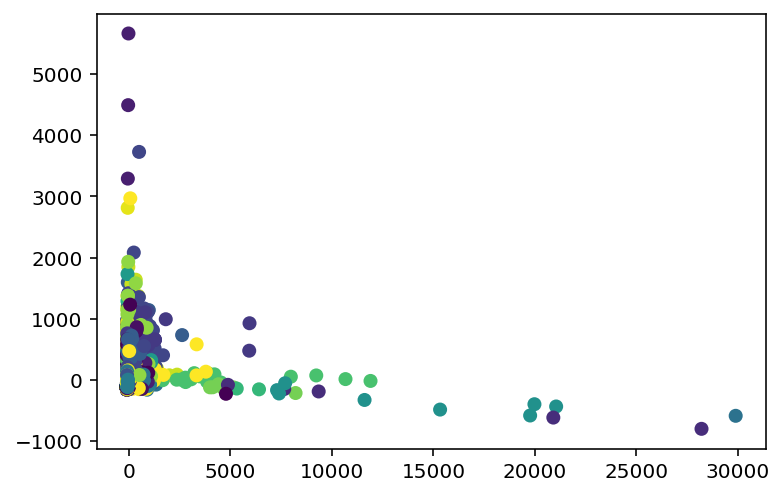

In [148]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = data_dropped2['FoodGroup'])

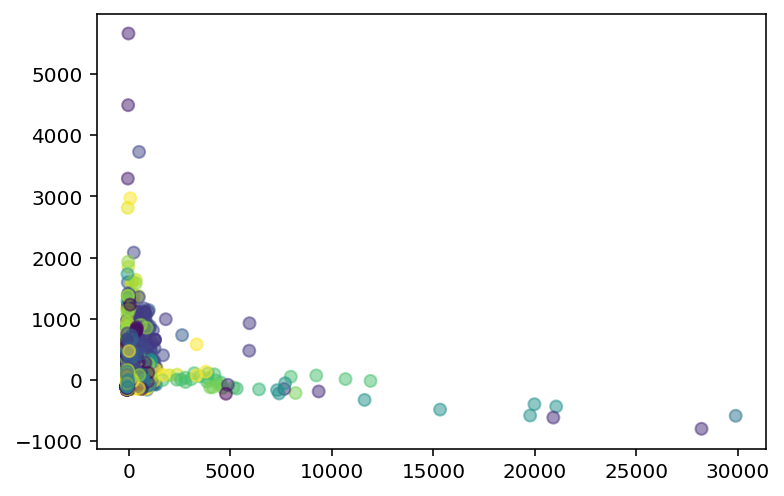

In [149]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = data_dropped2['FoodGroup'],alpha=0.5)

###**ทดลอง เปรียบเทียบค่าสารอาหาร baby food และ Spices and Herbs**

In [150]:
bb = data_dropped2[(data_dropped2['FoodGroup']==1) | (data_dropped2['FoodGroup']==22)]  ## ใช้  | และ  &  แทน  or  และ  and  ใน pandas
bb

,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
231,22,263,6.09,8.69,72.12,0.00,21.6,27,0.21,0.0,39.2,36,661,0.553,7.06,2.943,2.7,0.030000,0.123529,0.0,0.435556,0.000000,0.0900,0.178750,0.048462,0.084167,0.550833,0.000614,0.321429,0.161429,0.049091,0.091818
232,22,337,17.60,15.90,50.02,0.00,14.6,16,0.65,0.0,21.0,10,646,0.910,36.96,2.300,5.0,0.017778,0.382353,0.0,0.233333,0.000000,0.0250,0.191250,0.223077,0.283333,0.538333,0.001011,0.404762,0.628571,0.090909,0.481818
233,22,233,22.98,4.07,47.75,1.71,37.7,37,1.34,0.0,0.8,310,2240,2.100,89.80,9.800,3.0,0.041111,0.788235,0.0,0.008889,0.713333,0.7750,0.306250,0.923077,0.066667,1.866667,0.002333,1.692857,0.391429,0.054545,0.645455
234,22,313,7.61,8.36,74.97,0.00,26.3,309,1.74,0.0,46.5,180,834,0.416,43.00,8.167,2.8,0.343333,1.023529,0.0,0.516667,0.000000,0.4500,0.125312,0.323846,0.007500,0.695000,0.000462,0.285714,0.161429,0.050909,0.336364
235,22,333,19.77,14.59,49.90,0.64,38.0,18,0.36,0.0,21.0,10,689,0.910,16.23,1.300,12.1,0.020000,0.211765,0.0,0.233333,0.166667,0.0250,0.225375,0.291538,0.319167,0.574167,0.001011,0.614286,0.811429,0.220000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8588,1,389,6.60,0.90,88.60,1.35,2.6,0,0.09,0.0,250.0,5,38,0.377,9.00,1.298,16.3,0.000000,0.052941,0.0,2.777778,0.008667,0.0125,1.577500,1.446154,1.333333,0.031667,0.000419,0.088095,0.361429,0.296364,0.300000
8589,1,91,1.00,0.20,21.34,11.36,1.6,0,0.26,0.0,21.9,17,4,0.040,0.30,0.000,1.1,0.000000,0.152941,0.0,0.243333,0.016667,0.0425,0.033750,0.046154,0.016667,0.003333,0.000044,0.061905,0.028571,0.020000,0.004545
8590,1,68,0.30,0.20,16.30,14.66,1.0,2,0.06,0.0,12.3,4,3,0.030,0.10,0.000,0.6,0.002222,0.035294,0.0,0.136667,0.001333,0.0100,0.008125,0.015385,0.016667,0.002500,0.000033,0.019048,0.012857,0.010909,0.004545
8594,1,73,0.50,0.20,17.18,14.87,2.0,3,0.07,0.0,12.7,6,6,0.035,0.17,0.000,0.4,0.003333,0.041176,0.0,0.141111,0.052667,0.0150,0.017500,0.030769,0.008333,0.005000,0.000039,0.016667,0.012857,0.007273,0.007273


In [152]:
pca = PCA(n_components=2)
new_pca2 = pca.fit_transform(bb.iloc[:,1:].to_numpy())

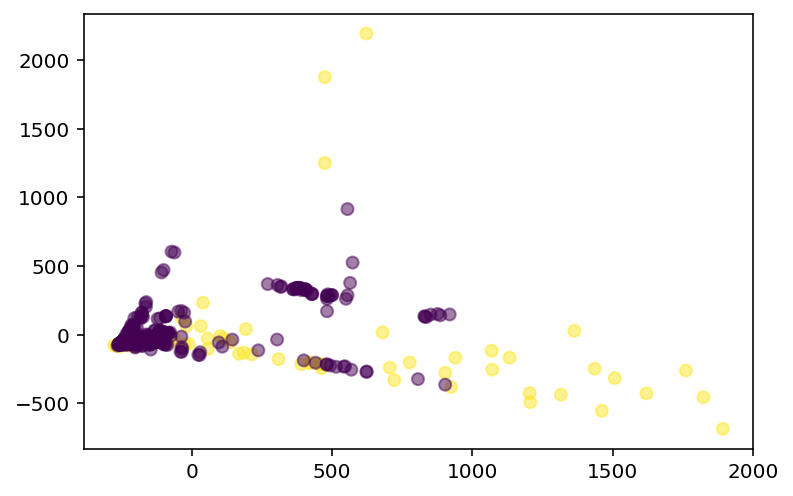

In [153]:
plt.scatter(new_pca2[:,0],new_pca2[:,1],c = bb['FoodGroup'],alpha=0.5)

In [154]:
baby_pca = pca.transform(bb[bb['FoodGroup']==1].iloc[:,1:].to_numpy())
SH_pca = pca.transform(bb[bb['FoodGroup']==22].iloc[:,1:].to_numpy())

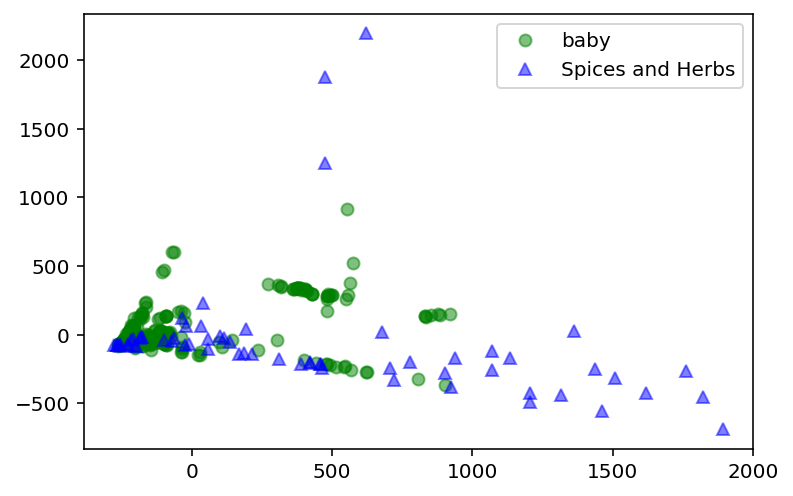

In [155]:
plt.plot(baby_pca[:,0],baby_pca[:,1],'og',alpha=0.5,label='baby')
plt.plot(SH_pca[:,0],SH_pca[:,1],'^b',alpha=0.5,label='Spices and Herbs')
plt.legend()

###**2 Principle components เป็นตัวแทนของข้อมูลได้ดีแค่ไหน**

In [156]:
pca.explained_variance_ratio_

array([0.69860777, 0.22364786])

###**การใส่ชื่อกราฟ และ แกน**

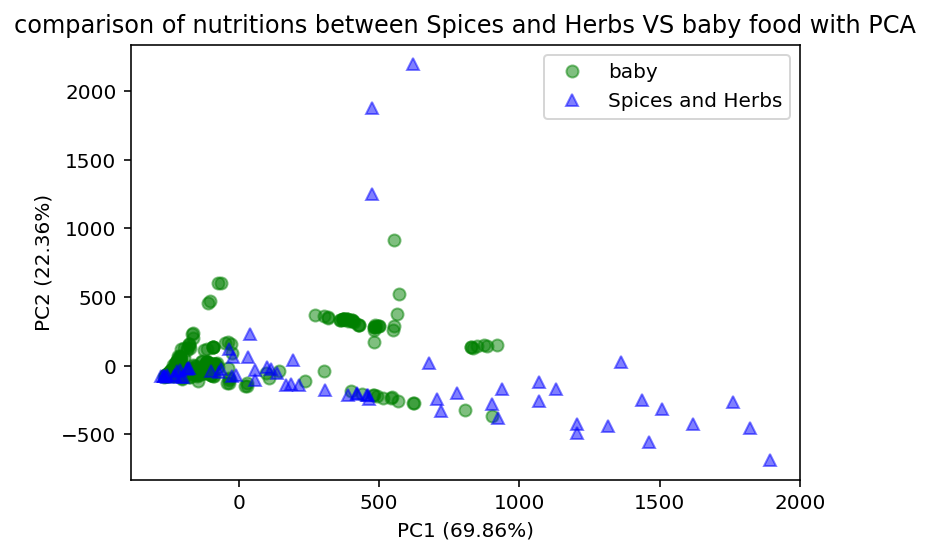

In [158]:
plt.plot(baby_pca[:,0],baby_pca[:,1],'og',alpha=0.5,label='baby')
plt.plot(SH_pca[:,0],SH_pca[:,1],'^b',alpha=0.5,label='Spices and Herbs')
plt.legend()
plt.title('comparison of nutritions between Spices and Herbs VS baby food with PCA')
plt.xlabel('PC1 (69.86%)')
plt.ylabel('PC2 (22.36%)');

component ที่เหมาะสมที่ถูกเลือกมาใช้จะครอบคลุม variance ประมาณ 80–90% ซึ่งจากที่เปรียบเทียบระหว่าง Spices and Herbs VS baby food แล้ว PC1 + PC2 บวกกันได้ 92.22% ซึ่งอธิบายได้ครอบคลุม